## Compare Gensim Textrank based model against BERT-based summarizer

In [ ]:
from summarizer import Summarizer

In [2]:
body = '''
The Chrysler Building, the famous art deco New York skyscraper, will be sold for a small fraction of its previous sales price.
The deal, first reported by The Real Deal, was for $150 million, according to a source familiar with the deal.
Mubadala, an Abu Dhabi investment fund, purchased 90% of the building for $800 million in 2008.
Real estate firm Tishman Speyer had owned the other 10%.
The buyer is RFR Holding, a New York real estate company.
Officials with Tishman and RFR did not immediately respond to a request for comments.
It's unclear when the deal will close.
The building sold fairly quickly after being publicly placed on the market only two months ago.
The sale was handled by CBRE Group.
The incentive to sell the building at such a huge loss was due to the soaring rent the owners pay to Cooper Union, a New York college, for the land under the building.
The rent is rising from $7.75 million last year to $32.5 million this year to $41 million in 2028.
Meantime, rents in the building itself are not rising nearly that fast.
While the building is an iconic landmark in the New York skyline, it is competing against newer office towers with large floor-to-ceiling windows and all the modern amenities.
Still the building is among the best known in the city, even to people who have never been to New York.
It is famous for its triangle-shaped, vaulted windows worked into the stylized crown, along with its distinctive eagle gargoyles near the top.
It has been featured prominently in many films, including Men in Black 3, Spider-Man, Armageddon, Two Weeks Notice and Independence Day.
The previous sale took place just before the 2008 financial meltdown led to a plunge in real estate prices.
Still there have been a number of high profile skyscrapers purchased for top dollar in recent years, including the Waldorf Astoria hotel, which Chinese firm Anbang Insurance purchased in 2016 for nearly $2 billion, and the Willis Tower in Chicago, which was formerly known as Sears Tower, once the world's tallest.
Blackstone Group (BX) bought it for $1.3 billion 2015.
The Chrysler Building was the headquarters of the American automaker until 1953, but it was named for and owned by Chrysler chief Walter Chrysler, not the company itself.
Walter Chrysler had set out to build the tallest building in the world, a competition at that time with another Manhattan skyscraper under construction at 40 Wall Street at the south end of Manhattan. He kept secret the plans for the spire that would grace the top of the building, building it inside the structure and out of view of the public until 40 Wall Street was complete.
Once the competitor could rise no higher, the spire of the Chrysler building was raised into view, giving it the title.
'''

model = Summarizer()
result = model(body, num_sentences=10)
full = ''.join(result)
print(full)

The Chrysler Building, the famous art deco New York skyscraper, will be sold for a small fraction of its previous sales price. The deal, first reported by The Real Deal, was for $150 million, according to a source familiar with the deal. Mubadala, an Abu Dhabi investment fund, purchased 90% of the building for $800 million in 2008. Real estate firm Tishman Speyer had owned the other 10%. The buyer is RFR Holding, a New York real estate company. The building sold fairly quickly after being publicly placed on the market only two months ago. The incentive to sell the building at such a huge loss was due to the soaring rent the owners pay to Cooper Union, a New York college, for the land under the building. The rent is rising from $7.75 million last year to $32.5 million this year to $41 million in 2028. Meantime, rents in the building itself are not rising nearly that fast. It has been featured prominently in many films, including Men in Black 3, Spider-Man, Armageddon, Two Weeks Notice a

In [3]:
from gensim.summarization import summarize

In [4]:
print(summarize(body, word_count=200))

The Chrysler Building, the famous art deco New York skyscraper, will be sold for a small fraction of its previous sales price.
Real estate firm Tishman Speyer had owned the other 10%.
The buyer is RFR Holding, a New York real estate company.
The incentive to sell the building at such a huge loss was due to the soaring rent the owners pay to Cooper Union, a New York college, for the land under the building.
Still the building is among the best known in the city, even to people who have never been to New York.
Still there have been a number of high profile skyscrapers purchased for top dollar in recent years, including the Waldorf Astoria hotel, which Chinese firm Anbang Insurance purchased in 2016 for nearly $2 billion, and the Willis Tower in Chicago, which was formerly known as Sears Tower, once the world's tallest.
Walter Chrysler had set out to build the tallest building in the world, a competition at that time with another Manhattan skyscraper under construction at 40 Wall Street a

The bert extractive summarizer seems to give higher quality summarization. One example is that the textrank based on immediately extracted "Real estate firm Tishman Speyer had owned the other 10%." where there is no context for doing so. (what are we referring to? 10% of what?)

The bert extractive summarizer gave the following : "Mubadala, an Abu Dhabi investment fund, purchased 90% of the building for $800 million in 2008. Real estate firm Tishman Speyer had owned the other 10%." so the context is clear. 

In [5]:
import pandas as pd
import os
import re
from datetime import datetime
from tqdm import tqdm

def list_files(dir):
    text = []
    for root, dirs, files in tqdm(os.walk(dir)):
        for name in files:
            #print(name)
            match = re.search(r"\d{4}-\d{2}-\d{2}", root)
            if match != None:
                date = datetime.strptime(match.group(), "%Y-%m-%d").date()
                txtfile = open(os.path.join(root, name), "r")
                data = txtfile.read()
                txtfile.close()
                #text.append((date, str))
                text.append(data)
    return text

text = list_files("./data")
len(text)

896it [00:02, 365.75it/s]


61177

In [6]:
text_clean = [re.sub(r'http\S+', '', t) for t in text]
text_clean= [t.strip().replace('\n', ' ') for t in text_clean]
docs = [re.sub(r'[\w\.-]+@[\w\.-]+', '', t) for t in text_clean]
docs = [t.strip().replace('`', ' ') for t in docs]
docs = [t.strip().replace('--', ' ') for t in docs]

## Summarize all the Bloomberg documents

In [12]:
summarized_docs = []
for doc in tqdm(docs):
    result = model(doc, num_sentences=10)
    full = ''.join(result)
    summarized_docs.append(full)


  5%|▌         | 3270/61177 [21:49<3:14:28,  4.96it/s] /home/pier/anaconda3/envs/bertopic/lib/python3.6/site-packages/summarizer/cluster_features.py:105: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  model = self.__get_model(k).fit(self.features)
 16%|█▋        | 10037/61177 [1:05:27<6:52:17,  2.07it/s] /home/pier/anaconda3/envs/bertopic/lib/python3.6/site-packages/summarizer/cluster_features.py:105: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  model = self.__get_model(k).fit(self.features)
 19%|█▉        | 11701/61177 [1:16:48<3:21:07,  4.10it/s] /home/pier/anaconda3/envs/bertopic/lib/python3.6/site-packages/summarizer/cluster_features.py:105: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  model = self.__get_model(k).fit(self.features)
 28%|█

In [121]:
summarized_docs[0]

"Goodyear Among Founders of Michigan Auto Trade Group   Mike Ramsey   2007-01-04T22:32:31Z                                        Goodyear Tire & Rubber Co. (GT)  and three other companies that do business with Michigan-based carmakers and auto-parts suppliers have formed a trade group to promote the state's ailing automotive industry. Michigan lost 101,000 automotive manufacturing jobs between 2001 and 2006, a 32 percent drop. Meanwhile, Southern states have increased  auto-industry  employment over the past 15 years by luring new factories from Toyota Motor Corp., Bayerische Motoren Werke AG and  Nissan Motor Co. (NSANY) , among others. and Warner Norcross & Judd LLP, a  law firm . The group is building a Web page        and developing a directory of Michigan automotive companies and related businesses. Michigan Ties    Goodyear doesn't have plants in Michigan, according to its Web site. It has factories in southern states including Texas,  North Carolina , Georgia, Virginia,  Alabam

In [14]:
summarized_docs[100]

'Jefferies Group Plans Debt Sale as Hiring Increases   B y   S a p n a   M a h e s h w a r i   2010-11-02T17:23:03Z    Jefferies Group Inc.  plans to sell $500 million of five-year notes in a boosted offering to further develop and diversify its business after increasing its  staff  31 percent in less than two years. The company raised the size of the issue from $350 million, according to a person familiar with the transaction. The notes may yield 275 basis points more than similar-maturity Treasuries, said the person, who declined to be identified because terms aren’t set. Jefferies, which  has increased  its headcount to 2,971 in August from 2,270 in December 2008 as larger investment banks scaled back operations, sold debt in June for the same purpose. The New York-based firm will most likely use funds to “hire talent and perhaps expand trading operations,” said  Guy LeBas , chief fixed-income strategist and economist at Janney Montgomery Scott LLC. The bank reported third-quarter r

In [15]:
summarized_docs[1000]

"New York State's Budget Gap May Reach $1 Billion, Deputy Comptroller Says   B y   M i c h a e l   Q u i n t   2010-11-15T23:09:25Z    New York’s  deficit for the current year, pegged by the Division of Budget at $315 million, may more than triple, Deputy Comptroller  Tom Nitido  said today. This year’s projected gap will be followed by a $9 billion deficit in the year beginning April 1, according to budget documents. Next year’s imbalance may reach $9.3 billion if lawmakers don’t close the current deficit with spending cuts, according to  Robert Megna , the state budget director. His spending and revenue estimates, along with those from the Senate Finance and Assembly Ways & Means committees, were presented today at a budget hearing in Albany. Nitido’s $1 billion projection for this year’s deficit “is not outlandish,” Megna said. Spending-Cuts Session  Governor  David Paterson  said he plans to call lawmakers back to Albany, the state capital, to approve spending cuts at a date still 

In [118]:
df = pd.DataFrame(summarized_docs)

In [119]:
df.head()

,0
0,Goodyear Among Founders of Michigan Auto Trade...
1,Geraldo Rivera Will Host Weekend Shows on Fox ...
2,Firms Face FSA Action Over Lehman-Backed Produ...
3,Increase Engagement by Encouraging Employees t...
4,Susan Cramm 2009-09-11T19:45:38Z ...


In [120]:
df.to_csv('summarized_docs.csv', index=False) # save the result

In [124]:
summarized_docs[0]

"Goodyear Among Founders of Michigan Auto Trade Group   Mike Ramsey   2007-01-04T22:32:31Z                                        Goodyear Tire & Rubber Co. (GT)  and three other companies that do business with Michigan-based carmakers and auto-parts suppliers have formed a trade group to promote the state's ailing automotive industry. Michigan lost 101,000 automotive manufacturing jobs between 2001 and 2006, a 32 percent drop. Meanwhile, Southern states have increased  auto-industry  employment over the past 15 years by luring new factories from Toyota Motor Corp., Bayerische Motoren Werke AG and  Nissan Motor Co. (NSANY) , among others. and Warner Norcross & Judd LLP, a  law firm . The group is building a Web page        and developing a directory of Michigan automotive companies and related businesses. Michigan Ties    Goodyear doesn't have plants in Michigan, according to its Web site. It has factories in southern states including Texas,  North Carolina , Georgia, Virginia,  Alabam

## Re-train Top2Vec using summarized documents 

In [125]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import pandas as pd
import os
import re
from datetime import datetime
from tqdm import tqdm
from top2vec import Top2Vec

sentence_stream = [doc.split(" ") for doc in summarized_docs]
bigram = Phrases(sentence_stream, min_count=5, threshold=100, delimiter=b' ')
bigram_phraser = Phraser(bigram)


In [126]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags

#def default_tokenizer(doc):
#    """Tokenize documents for training and remove too long/short words"""
#    return simple_preprocess(strip_tags(doc), deacc=True)

def bigrammer(doc):
    #sentence_stream = doc.split(" ")
    sentence_stream = simple_preprocess(strip_tags(doc), deacc=True)
    return bigram_phraser[sentence_stream]

In [127]:
#model = Top2Vec(documents=summarized_docs, speed="learn", tokenizer=bigrammer, workers=8) # pass in bigrammer in place of default_tokenizer.
model = Top2Vec.load("top2vec_bloomberg_2.0_docs_bigrams_deeplearn_summarized")

In [45]:
model.save("top2vec_bloomberg_2.0_docs_bigrams_deeplearn_summarized")

In [46]:
print("Done")

Done


In [129]:
model.get_num_topics()

640

In [130]:
topic_words, word_scores, topic_nums = model.get_topics(640)

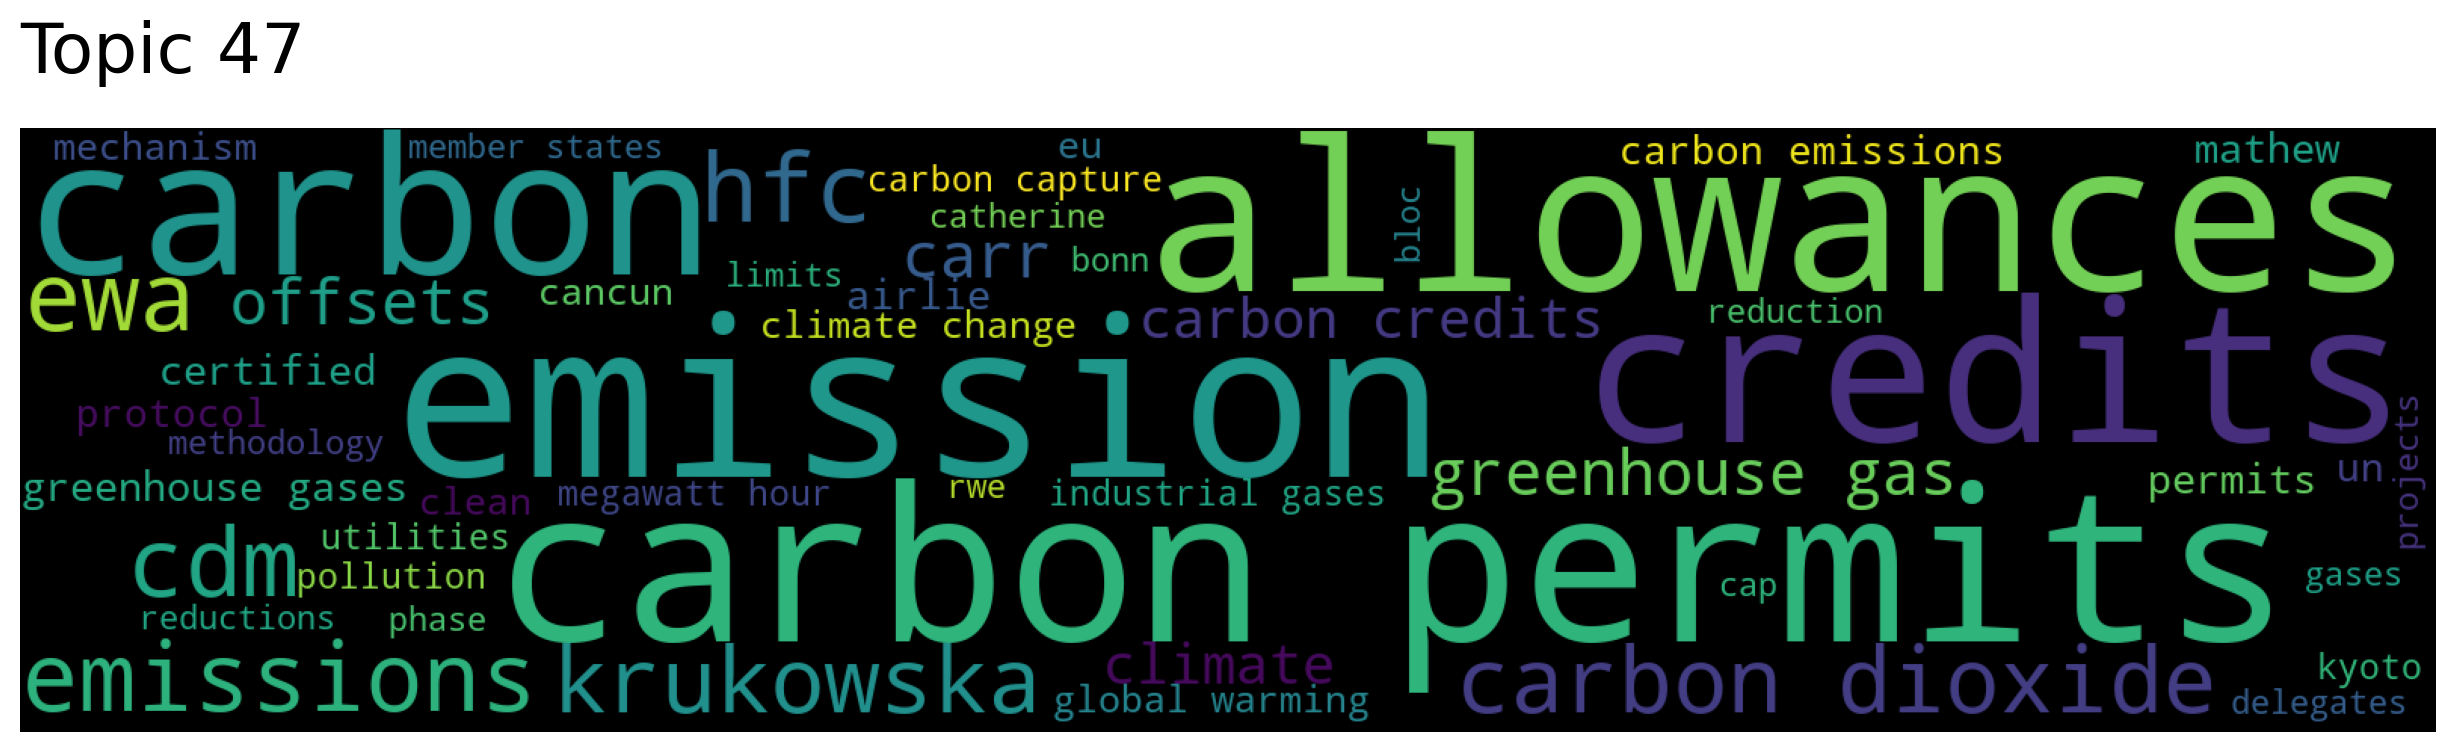

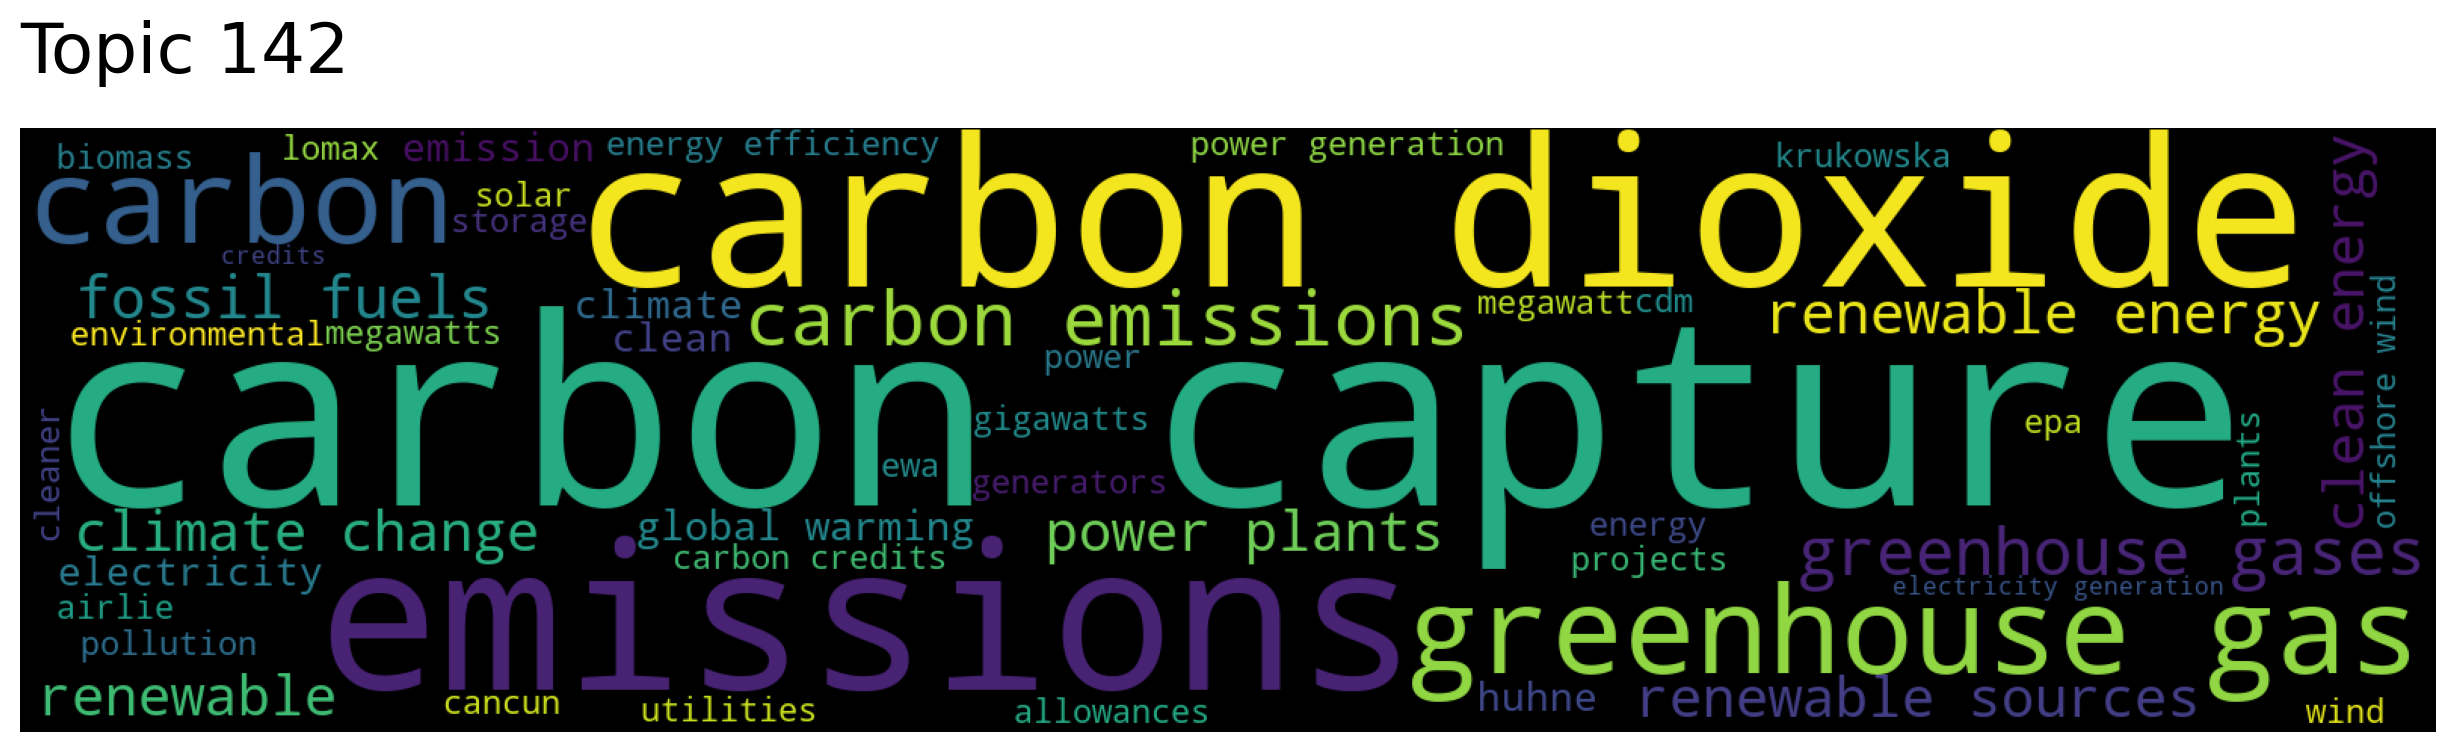

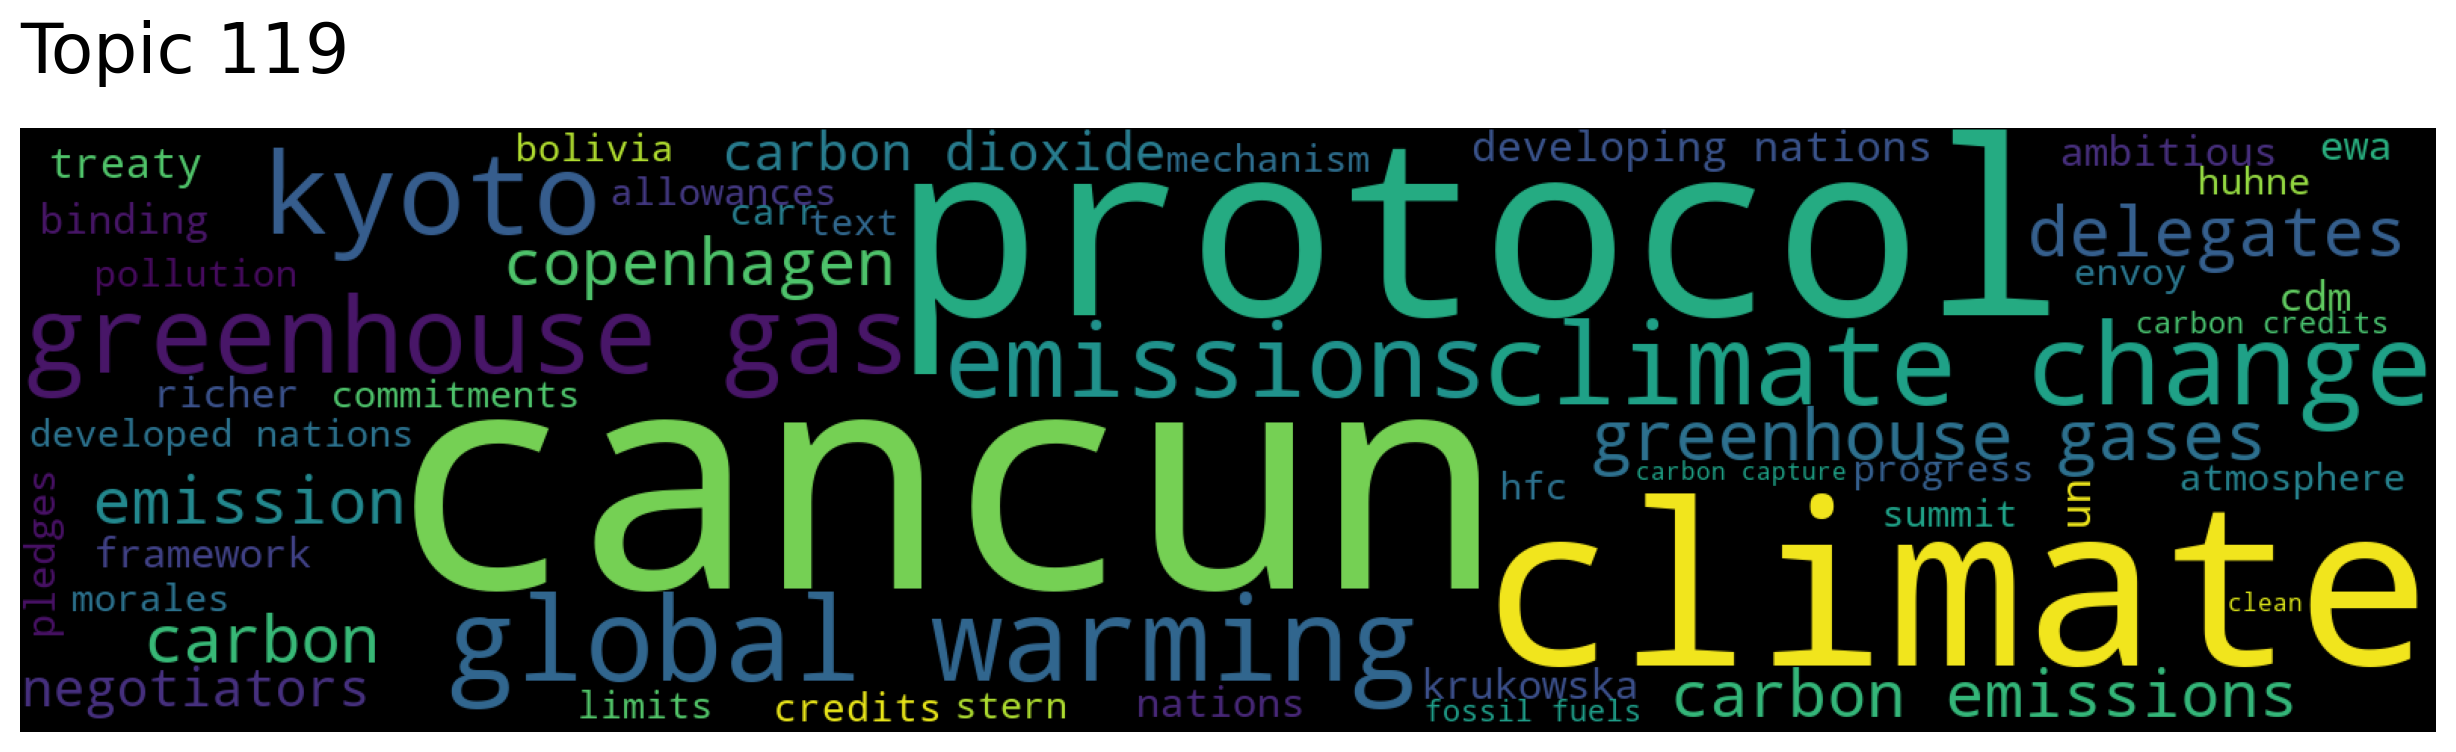

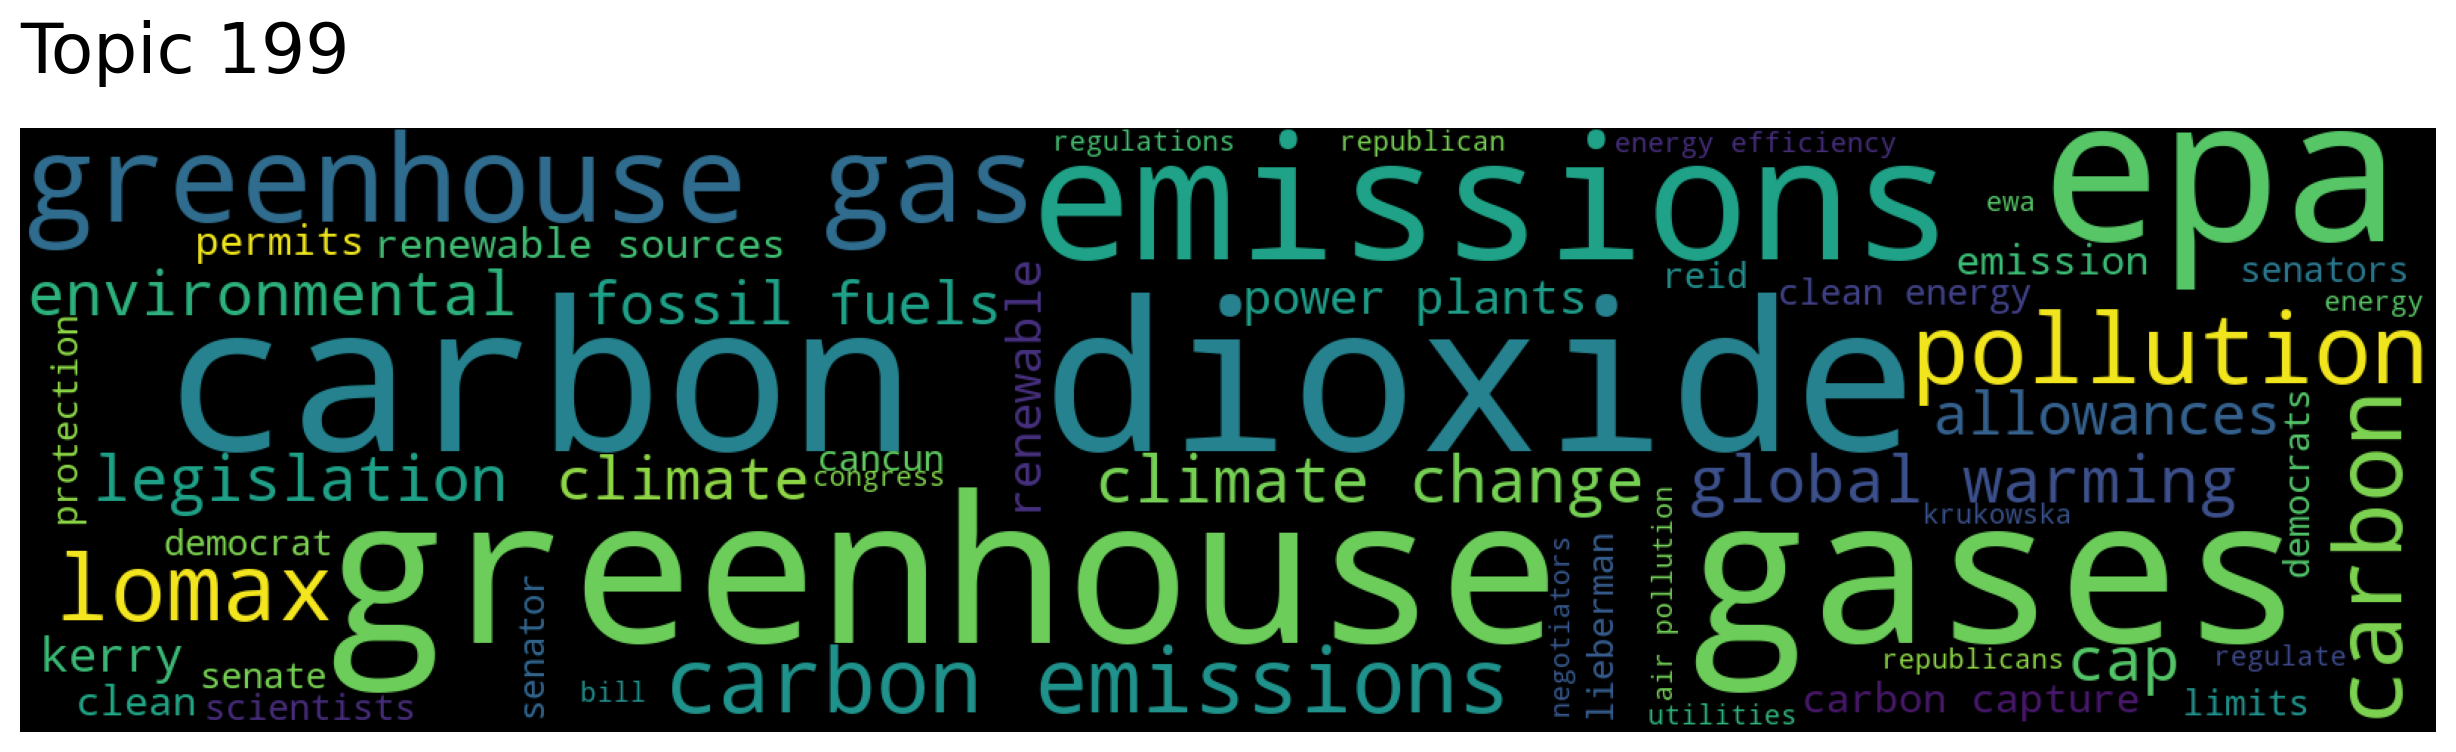

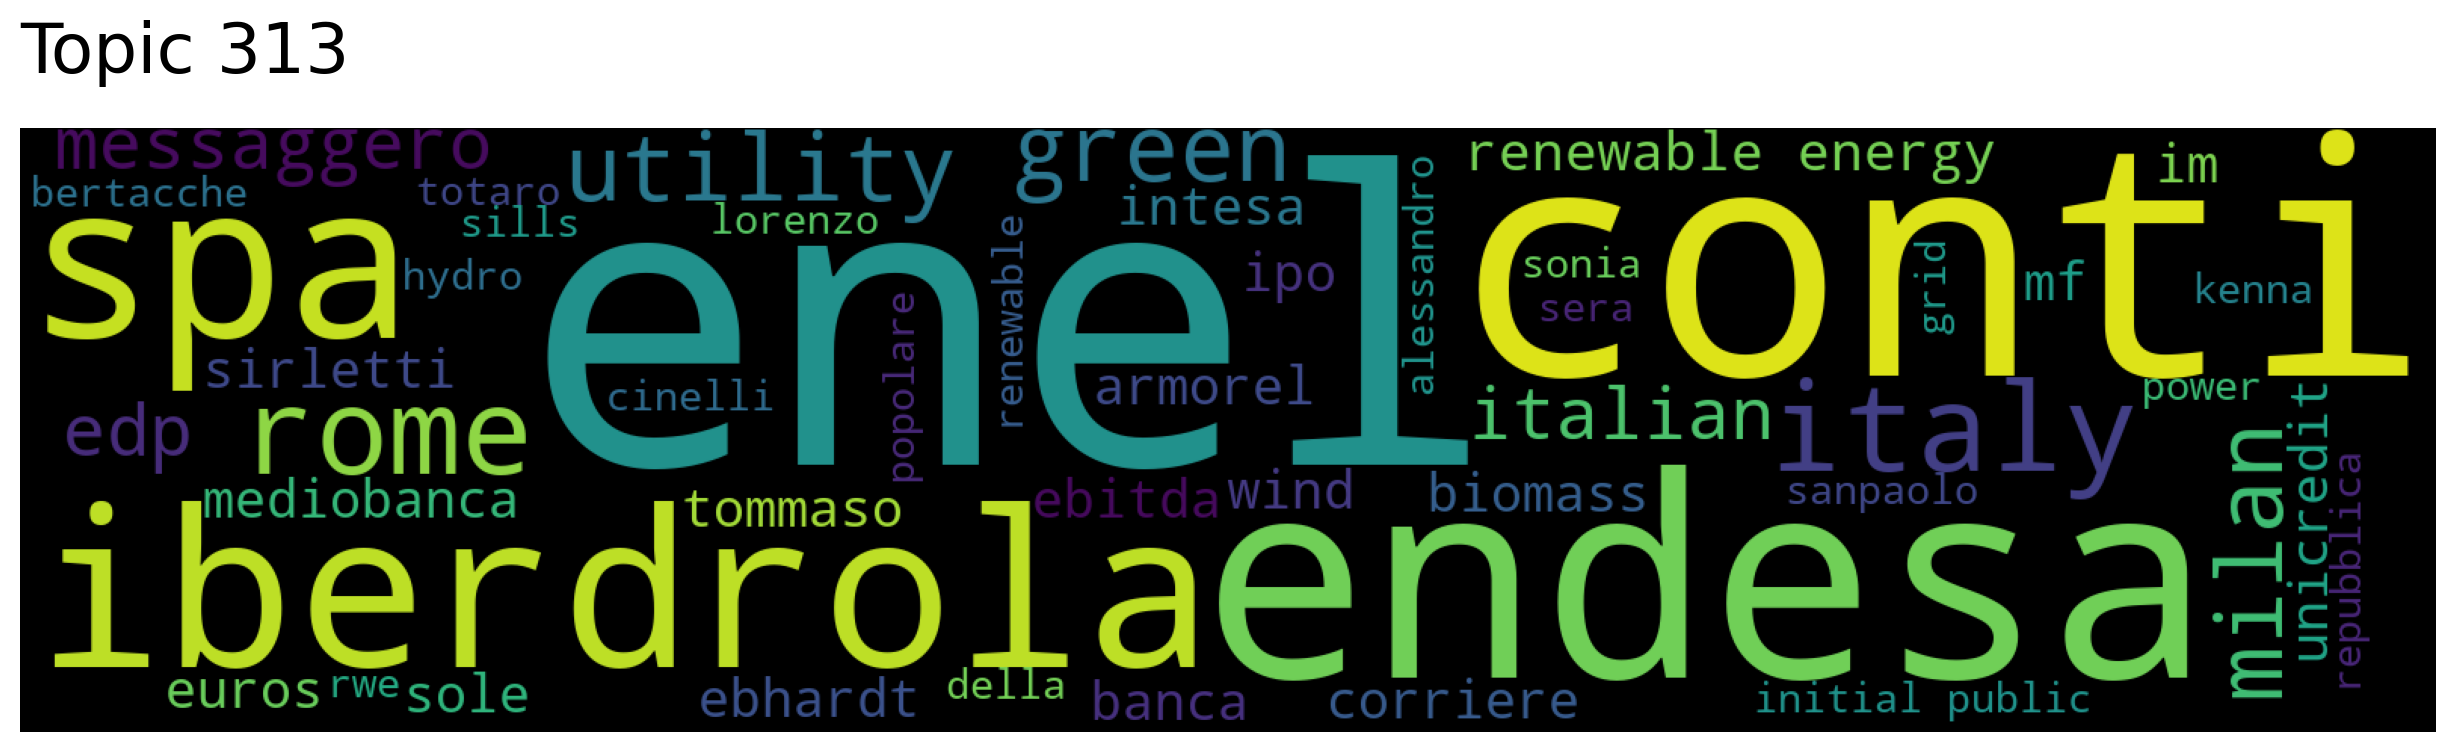

In [131]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["carbon credits"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [132]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=47, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 24088, Score: 0.8216977715492249
-----------
UN Carbon Offsets Rise Most in Almost Four Weeks After ICE Proposes Change   B y   E w a   K r u k o w s k a   a n d   C a t h e r i n e   A i r l i e   2010-12-10T17:37:09Z    United Nations carbon credits rose the most in almost four weeks after the ICE Futures Europe exchange proposed that offsets used for settlement against its contracts must comply with European trading rules. UN Certified Emission Reductions for December 2011 gained as much as 2.4 percent, the most since Nov. 15, to 11.50 euros ($15.21) a metric ton on ICE in London. The contract traded at 11.40 euros as of 5:20 p.m., recovering from a more than eight- month low of 11.13 euros earlier today amid lower volumes. The planned change in the treatment of UN credits follows a Nov. 25 proposal by the European Union regulator to ban offsets generated by projects linked to industrial gases hydrofluorocarbon-23 and nitrous oxide, with effect from Jan. 1, 2013, ICE said 

In [133]:
doc_topics = model.get_documents_topics([24088])
topic_names = doc_topics[2]
topic_probs = doc_topics[3]
df_topics = pd.DataFrame(topic_names).transpose().rename(columns={0 : "Topics"})
df_probs = pd.DataFrame(topic_probs).transpose().rename(columns={0 : "Probability"})
df = pd.concat([df_topics, df_probs], axis=1)


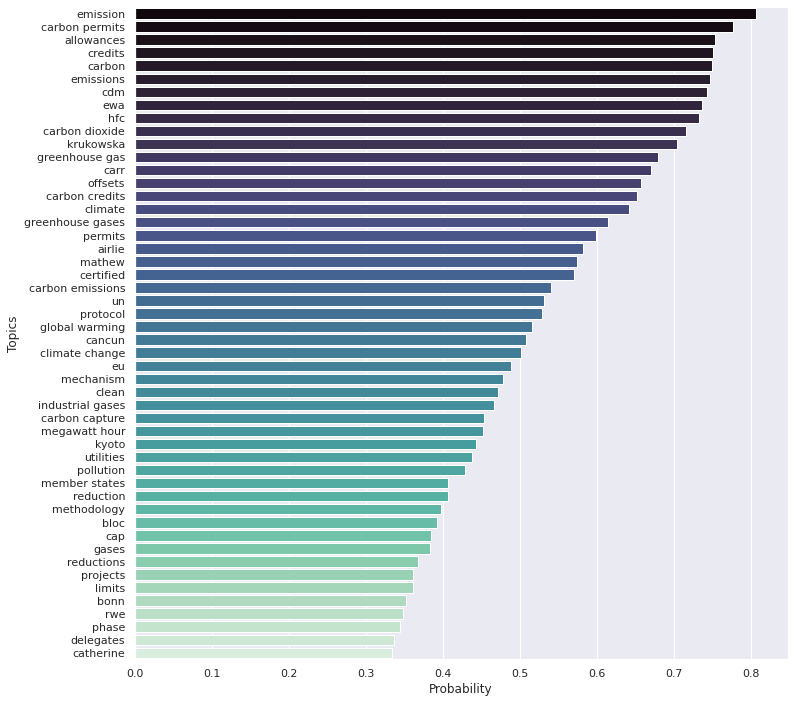

In [134]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,12)})
ax = sns.barplot(x="Probability", y="Topics", data=df, palette="mako")

## Reload the data, if required

In [2]:
import pandas as pd

In [25]:
#df_summarized_docs = pd.read_csv('summarized_docs.csv').fillna(" ") 

In [26]:
#summarized_docs = df_summarized_docs['0'].tolist()

## Train BERTopic Using Summarized Documents 

As BERTopic relies on sentence-transformer distilbert based model, the tokens have to be 512 or less. We use a summarizer to achieve this.
If you want to keep all the information in the documents, you may need to split the documents into 512 character chunks. 

In [27]:
from bertopic import BERTopic
 
berttopic_model = BERTopic(language="english", stop_words="english")


In [30]:
len(summarized_docs)

61177

In [29]:
topics, probabilities = berttopic_model.fit_transform(summarized_docs)

Token indices sequence length is longer than the specified maximum sequence length for this model (527 > 512). Running this sequence through the model will result in indexing errors


In [92]:
berttopic_model.save("bloomberg_bertopic_withbigrams_summary")
print("Done!")

/home/pier/anaconda3/envs/bertopic/lib/python3.6/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



Done!


In [31]:
berttopic_model.get_topic_freq().head(20)

,Topic,Count
0,-1,21896
1,471,1570
2,208,1262
3,17,1256
4,129,1083
5,43,977
6,428,950
7,275,885
8,459,813
9,29,788


## Look for carbon credits related topics and subsequently the documents

In [33]:
berttopic_model.find_topics("carbon credits")

([291, 65, 69, 282, 110],
 [0.7208845763100009,
  0.6787719771436171,
  0.6547961065497193,
  0.6289278534510614,
  0.6140871864086008])

In [34]:
berttopic_model.get_topic(291)

[('carbon', 0.07727212840247967),
 ('emissions', 0.0495720519326011),
 ('capandtrade', 0.03420472225437372),
 ('tianjin', 0.02170343256710218),
 ('lowcarbon', 0.0151749071512884),
 ('ge', 0.013163796065994032),
 ('pollution', 0.013157438894965352),
 ('apec', 0.013115816459166686),
 ('carbontrading', 0.013018197045631664),
 ('innovation', 0.012668540080859506)]

In [87]:
berttopic_model.get_topic(65)

[('carbon', 0.055582118330325316),
 ('emissions', 0.04047230991327884),
 ('energy', 0.02892730771851422),
 ('greenhouse', 0.027999277339071347),
 ('dioxide', 0.02677334659661134),
 ('emission', 0.014631431900666493),
 ('renewable', 0.01411838561186124),
 ('solar', 0.012924756519350157),
 ('electricity', 0.010954794241199196),
 ('obama', 0.010445609213589573)]

In [88]:
berttopic_model.get_topic(282)

[('allowances', 0.08157022029385086),
 ('carbon', 0.06959234117295335),
 ('eu', 0.05732685428338004),
 ('emission', 0.051589345071979625),
 ('euros', 0.04038007314995114),
 ('lowest', 0.039682530412387736),
 ('emissions', 0.028425622361626827),
 ('carbondioxide', 0.02124063277627439),
 ('low', 0.01673113361977475),
 ('offsets', 0.015701760976715738)]

In [75]:
# Get topics mostly classified as 291 
def find_docs(topic_id):
    x = []
    for idx, item in enumerate(topics):
        if topics[idx]==topic_id:
            x.append(idx)
    return x

In [110]:
found_docs = find_docs(291)

In [111]:
for i in range(5):   
    print(f"Document: {found_docs[i]}")
    print("-----------")
    print(summarized_docs[found_docs[i]]) 
    print("-----------")
    print()

Document: 2521
-----------
China May Establish Carbon Trading by 2013, Climate Exchange's Sandor Says   B y   J o h n   D u c e   2010-11-04T08:18:28Z    China, the world’s biggest energy consuming nation, may have a carbon trading system in place as soon as 2013, said  Richard Sandor , one of the pioneers of the carbon credit market. Under a cap and trade system, emitters who reduce carbon more than a set amount earn credits that they can sell. Carbon is now the largest traded commodity in Europe, Sandor said. The system works and emissions are declining. Reduction targets are being met, and need to be tightened, he said. “Europe is not as far ahead on cap and trade and China is not so far behind as people think,” Sandor said. Envoys from around the world are to meet in Cancun in Mexico from Nov. 29 to Dec. 10 to try to reach an international agreement on climate change. Negotiators failed to reach a binding deal on greenhouse gas emission cuts at a United Nations summit in Copenhagen

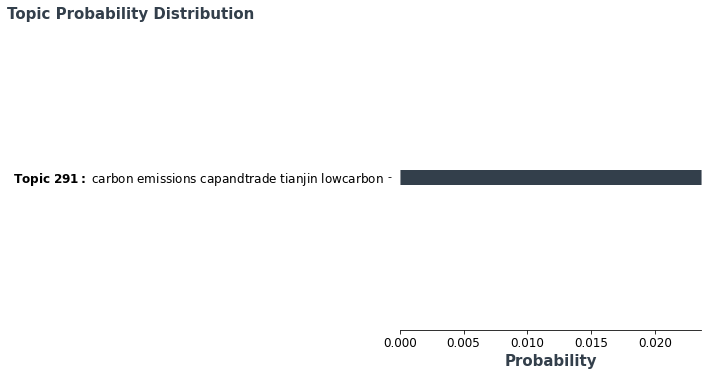

In [80]:
berttopic_model.visualize_distribution(probabilities[found_docs[0]])

## Let's try wikileaks now

In [81]:
berttopic_model.find_topics("wikileaks")

([284, 302, 303, 293, 151],
 [0.6832236560871978,
  0.6222223415846131,
  0.6040413005683027,
  0.5425904868476213,
  0.4924279042861072])

In [82]:
berttopic_model.get_topic(284)

[('internet', 0.04531775535467445),
 ('web', 0.0290187595842571),
 ('verizon', 0.027409692802669357),
 ('comcast', 0.024889980254160827),
 ('providers', 0.024790873317658686),
 ('netneutrality', 0.02335924337910464),
 ('communications', 0.019277057050795875),
 ('wireless', 0.01717535989375535),
 ('privacy', 0.01645826003658206),
 ('internetservice', 0.01641897902521627)]

In [89]:
berttopic_model.get_topic(302)

[('facebook', 0.09631064131654658),
 ('myspace', 0.039372366451508156),
 ('twitter', 0.033392455569238776),
 ('socialnetworking', 0.02263911070961719),
 ('yahoo', 0.01663084195938642),
 ('web', 0.011778723371432943),
 ('wikileaks', 0.011487788755210344),
 ('assange', 0.009900500113245928),
 ('website', 0.00980824967279593),
 ('networking', 0.009240063198311266)]

We'll use this as it has mentions of "wikileaks" and "assange".

In [90]:
berttopic_model.get_topic(303)

[('hulu', 0.07364877981550647),
 ('techcrunch', 0.05149099600911727),
 ('showtime', 0.04130460483079028),
 ('mtv', 0.02709768215248021),
 ('online', 0.026582618021746572),
 ('subscription', 0.024519009605754222),
 ('comcast', 0.0241121683712183),
 ('internet', 0.0236393098845297),
 ('viacom', 0.019913075120784874),
 ('subscribers', 0.01924182217605353)]

In [109]:
found_docs = find_docs(302)
for i in range(5):   
    print(f"Document: {found_docs[i]}")
    print("-----------")
    print(summarized_docs[found_docs[i]]) 
    print("-----------")
    print()

Document: 65
-----------
Square Enix Says It Starts Offering Facebook Games; Shares Pare Declines   B y   Y o s h i n o r i   E k i   2010-11-02T04:57:15Z    Square Enix Holdings Co., the Japanese games developer, began offering titles geared for Facebook Inc.’s online social-networking service. The company began offering "Chocobo’s Crystal Tower" and "Knights of the Crystals" for Facebook users, Square Enix said today in an e-mailed statement. They’re Square Enix’s first Facebook games, said Misa Tokunaga, a spokeswoman at the Japanese company. Square Enix fell 2.6 percent to 1,629 yen at 1:52 p.m. in Tokyo, paring an earlier decline of as much as 6.8 percent. Yoshinori Eki in Tokyo at      To contact the editor responsible for this story:
-----------

Document: 622
-----------
Facebook Adds E-Mail, Stepping Up Rivalry With Google   B y   D o u g l a s   M a c M i l l a n   2010-11-16T19:09:58Z    (Corrects Garlinghouse’s title in last paragraph in story that ran Nov. 15.) The new ser

Hmm... not so correct.

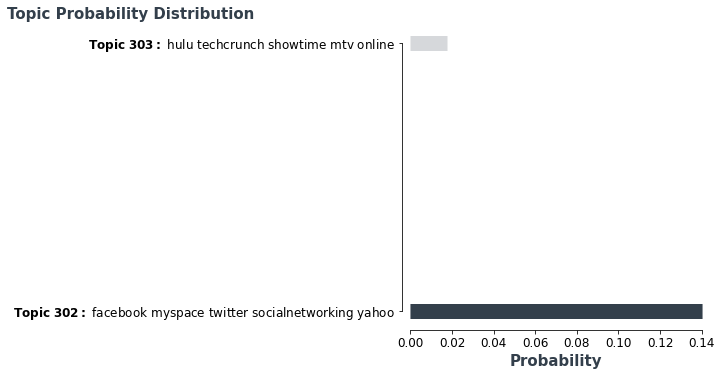

In [92]:
berttopic_model.visualize_distribution(probabilities[found_docs[0]])

In [55]:
berttopic_model.find_topics("iphone")

([310, 309, 278, 301, 450],
 [0.8899400733373334,
  0.6341316641966224,
  0.5531720716177113,
  0.5225251738710993,
  0.515759933585692])

In [61]:
berttopic_model.get_topic(310)

[('apple', 0.06973446746986414),
 ('iphone', 0.04397078853004391),
 ('ipad', 0.032045869347847186),
 ('android', 0.018866075451069216),
 ('smartphone', 0.018223615424864614),
 ('blackberry', 0.014308330613388482),
 ('smartphones', 0.01138520057589841),
 ('samsung', 0.009796446709028368),
 ('ipod', 0.00816471935667668),
 ('motorola', 0.008150919016267306)]

In [97]:
berttopic_model.get_topic(309)

[('nokia', 0.18123064218928342),
 ('smartphone', 0.03702947800636373),
 ('nokias', 0.036388040064654785),
 ('iphone', 0.034455550543369295),
 ('smartphones', 0.02288673579120098),
 ('kallasvuo', 0.022454584847787402),
 ('helsinki', 0.02118741143452861),
 ('finnish', 0.017047744972161445),
 ('finlandbased', 0.0168726833645453),
 ('apps', 0.01290948941539515)]

In [108]:
found_docs = find_docs(310)
for i in range(5):   
    print(f"Document: {found_docs[i]}")
    print("-----------")
    print(summarized_docs[found_docs[i]]) 
    print("-----------")
    print()

Document: 0
-----------
Goodyear Among Founders of Michigan Auto Trade Group   Mike Ramsey   2007-01-04T22:32:31Z                                        Goodyear Tire & Rubber Co. (GT)  and three other companies that do business with Michigan-based carmakers and auto-parts suppliers have formed a trade group to promote the state's ailing automotive industry. Michigan lost 101,000 automotive manufacturing jobs between 2001 and 2006, a 32 percent drop. Meanwhile, Southern states have increased  auto-industry  employment over the past 15 years by luring new factories from Toyota Motor Corp., Bayerische Motoren Werke AG and  Nissan Motor Co. (NSANY) , among others. and Warner Norcross & Judd LLP, a  law firm . The group is building a Web page        and developing a directory of Michigan automotive companies and related businesses. Michigan Ties    Goodyear doesn't have plants in Michigan, according to its Web site. It has factories in southern states including Texas,  North Carolina , Geo

First document is off, the rest are ok. 

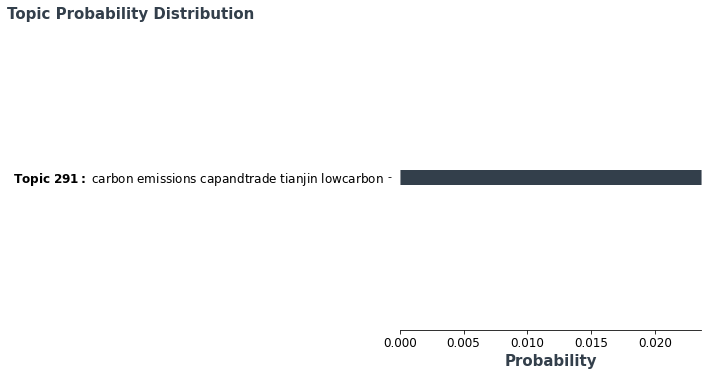

In [115]:
berttopic_model.visualize_distribution(probabilities[found_docs[0]])